# House Prices Prediction in Northwestern county

## 1. Business understanding

### a) Introduction
In this project, the aim is to analyze house sales in Northwestern county using multiple linear regression modeling. By leveraging historical data on house sales and associated factors, we seek to gain insights into the dynamics of the local real estate market.This is to help:
* Homeowners and Home Buyers: Homeowners looking to sell their property can leverage the model's predictions to estimate the potential selling price and make informed decisions about pricing and negotiation. Home buyers can use the predictions to assess whether a listed house is reasonably priced, helping them in their decision-making process.


### b) Problem of the statement
The objective is to address the challenges faced by various homeowners and home buyers in the housing market. Specifically, we aim to identify the key factors influencing house sale prices and develop a predictive model to accurately estimate the selling price of houses based on these factors.

### c) Main Objective
The main objective of this project is to provide actionable insights and decision-making support to homeowners and home buyers in the housing market by leveraging multiple linear regression modeling. By understanding the relationships between house characteristics (such as square footage, number of bedrooms, location, amenities) and sale prices, we aim to enhance pricing strategies, optimize property values, and facilitate informed negotiations.

### d) Specific Objectives
1. Develop a robust multiple linear regression model that accurately predicts house sale prices based on relevant features.
2. Identify the most significant factors that influence house prices in the northwestern county, prioritizing features that have the greatest impact.
3. Provide homeowners and home buyers with a comprehensive understanding of the local housing market dynamics, enabling them to make data-driven decisions regarding house pricing.

### e) Experimental Designs
1. Data collection
2. Read and check data
3. Exploratory Data Analysis
4. Modelling 
5. Regression results
5. Conclusions and Recommendations

## 2. Data Understanding

In [1]:
# Load the necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15,8)

### a) Load data and check out

In [2]:
houseDF = pd.read_csv('data/kc_house_data.csv')
houseDF.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Check the size of the dataset
houseDF.shape

(21597, 21)

The dataset has 21 columns and 21597 rows.

**Dropping columns**
The columns dropped have minimum impact on the price and they are rarely considered during the purchase of houses.

In [4]:
houseDF = houseDF.drop(['id','zipcode','sqft_basement',
                    'yr_renovated','sqft_living15','sqft_lot15', 'sqft_above'], axis='columns')

### Checking columns

In [5]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         21597 non-null  object 
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   view         21534 non-null  object 
 9   condition    21597 non-null  object 
 10  grade        21597 non-null  object 
 11  yr_built     21597 non-null  int64  
 12  lat          21597 non-null  float64
 13  long         21597 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 2.3+ MB


* Bathrooms and floors column should me int.
* Create a new column with **the age of the respective houses**. Use the date column and the yr_built then drop the two columns.

In [6]:
# Get the copy of the original dataset
check_house = houseDF.copy()

In [7]:
# Split the date column to get the year sold.
check_house['date'] = check_house['date'].str.split('/').str[-1]

# Get the age of the houses 
check_house['Age'] = pd.to_datetime(check_house['date']).dt.year - check_house['yr_built']

#Drop the date, yr_built column
check_house = check_house.drop(['date','yr_built'], axis='columns')


# Convert the floor and the bathrooms to int
check_house[['floors', 'bathrooms']] = check_house.loc[:, ['floors', 'bathrooms']] = check_house[['floors', 'bathrooms']].apply(lambda x: np.floor(x).astype(int))


# Check for the changes
check_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,Age
0,221900.0,3,1,1180,5650,1,NaN,NONE,Average,7 Average,47.5112,-122.257,59
1,538000.0,3,2,2570,7242,2,NO,NONE,Average,7 Average,47.7210,-122.319,63
2,180000.0,2,1,770,10000,1,NO,NONE,Average,6 Low Average,47.7379,-122.233,82
3,604000.0,4,3,1960,5000,1,NO,NONE,Very Good,7 Average,47.5208,-122.393,49
4,510000.0,3,2,1680,8080,1,NO,NONE,Average,8 Good,47.6168,-122.045,28


In [8]:
# Check the changes in dtype
check_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  int64  
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  int64  
 6   waterfront   19221 non-null  object 
 7   view         21534 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
 12  Age          21597 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 2.1+ MB


**Check the distribution of the numeric features**

In [9]:
check_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,lat,long,Age
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,1.750660,2080.321850,1.509941e+04,1.445988,47.560093,-122.213982,43.323286
std,3.673681e+05,0.926299,0.734042,918.106125,4.141264e+04,0.551658,0.138552,0.140724,29.377285
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,47.155900,-122.519000,-1.000000
25%,3.220000e+05,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,47.471100,-122.328000,18.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,47.571800,-122.231000,40.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,47.678000,-122.125000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,47.777600,-121.315000,115.000000


**Observations:**
- House Price Range: The minimum price of a house in the dataset is 78,000, while the maximum price is 7,700,000. This indicates a wide range of prices within the dataset.

- Average House Price: The mean house price in the dataset is approximately 540,296, which provides an indication of the average price level.

**Check the value counts of the categorical features:**

In [11]:
categorical = check_house.select_dtypes("object")

for col in categorical:
    print(check_house[col].value_counts(), "\n")

waterfront
NO     19075
YES      146
Name: count, dtype: int64 

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64 

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64 

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64 



## 2. Data Preparation
### Clean the data
**Missing data**

In [15]:
# Check any missing value
check_house.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
view             63
condition         0
grade             0
lat               0
long              0
Age               0
dtype: int64

In [12]:
#Find the total percentage of the missng data
(sum(check_house.isnull().sum())/len(check_house))*100

11.293235171551604

Drop the columns of null values since the percentage of missing values is only 11% of the data set.

In [13]:
# Drop the null values
check_house.dropna(inplace=True)

In [14]:
# Confirm the changes of dropping
check_house.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
grade          0
lat            0
long           0
Age            0
dtype: int64

In [18]:
check_house.shape

(19164, 13)

**Outliers**

Check for outliers in:
1) **Bedrooms with relation to sqft_living** - the living area should determine the number of bedrooms. The average ratio of living area to number of bedrooms should be  greater than 132sqft. Drop any ratio that is less than 132.
2) **Bathrooms with relation to bedrooms** - the number of bathrooms should be less than the number of bedrooms + 2.  
3) Check the age column to work with only house with age > 1

1. **Bedrooms with relation to sqft_living**

In [15]:
#Bedroom Column - typical bedroom size is 132sqft
check_house[check_house.sqft_living/check_house.bedrooms<132]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,Age
15856,640000.0,33,1,1620,6000,1,NO,NONE,Very Good,7 Average,47.6878,-122.331,67


In [16]:
# Drop the outlier
check_house = check_house[~(check_house.sqft_living/check_house.bedrooms<132)]

2. **Bathrooms with relation to bedrooms**

In [22]:
check_house[check_house.bathrooms > check_house.bedrooms+2]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,Age


3. **Age > 1**

In [25]:
# Insepct the age column
check_house[check_house.Age < 1].value_counts().sum()

397

In [28]:
# Drop the rows with Age < 1 
check_house = check_house[check_house['Age'] > 1]  

# Inspect the change
check_house[check_house.Age < 1].value_counts().sum()

0

In [29]:
# Create a copy of the clean data
clean_data = check_house.copy()

## 3. Modeling
Reference p_value = 0.05, in all models that will be created.
1. Create a baseline model to act as a sanity check to ensure that the model-building process is on the right track.
2. Create a model with numerical variables that is (bedrooms, bathrooms, Square footage living, age, square footage of lot.
3. Create a model with categorical variables that is (grading, condition, view and waterfront).

####  a) Build a baseline simple linear regression
Identify the column with the highest correlation with out target variable price

In [38]:
# Find the relationship of the columns with respect to price
clean_data.select_dtypes('number').corr()['price']

price          1.000000
bedrooms       0.312011
bathrooms      0.507766
sqft_living    0.703139
sqft_lot       0.090655
floors         0.235126
lat            0.304040
long           0.021070
Age           -0.034588
Name: price, dtype: float64

THe sqft_living has the highest correlation of 0.704 with price.

**Setting variables for Regression**

In [39]:
#identify the variables
y = clean_data['price'] #Series of the target variable
X_baseline = clean_data[['sqft_living']] #dataframe of the column with the highest correlation

**Creating and fitting the linear regression Model**

In [40]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

#Check the results
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                 1.810e+04
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:02:57   Log-Likelihood:            -2.5730e+05
No. Observations:               18516   AIC:                         5.146e+05
Df Residuals:                   18514   BIC:                         5.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.738e+04   4745.835     -9.983      0.000   -5.67e+04   -3.81e+04
sqft_living   282.8764      2.102    134.552      0.000     278.756     286.997
==============================================================================
Omnibus:                    12906.266   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           501279.104
Skew:                           2.871   Prob(JB):                         0.00
Kurtosis:                      27.835   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Observation**
* R-squared: The R-squared has the  value of 0.496 this indicates approximately 49.6% of the variance in the dependent variable (price) can be explained by the independent variable (sqft_living). This suggests that the model explains a moderate portion of the variability in house prices.
* F-statistic: The F-statistic values with a corresponding p-value of 0.00 indicates that the overall regression model is statistically significant. This suggests that the independent variables is significantly related to the dependent variable.
* On average, for each unit increase in square footage of living area, the predicted house price increases by approximately \\$283.8012. The square footage of living area is statistically significant (p < 0.05), implying a significant relationship between sqft_living and price.

####  a) Multi-linear modeling

**Explore data analysis for the price of the homes**

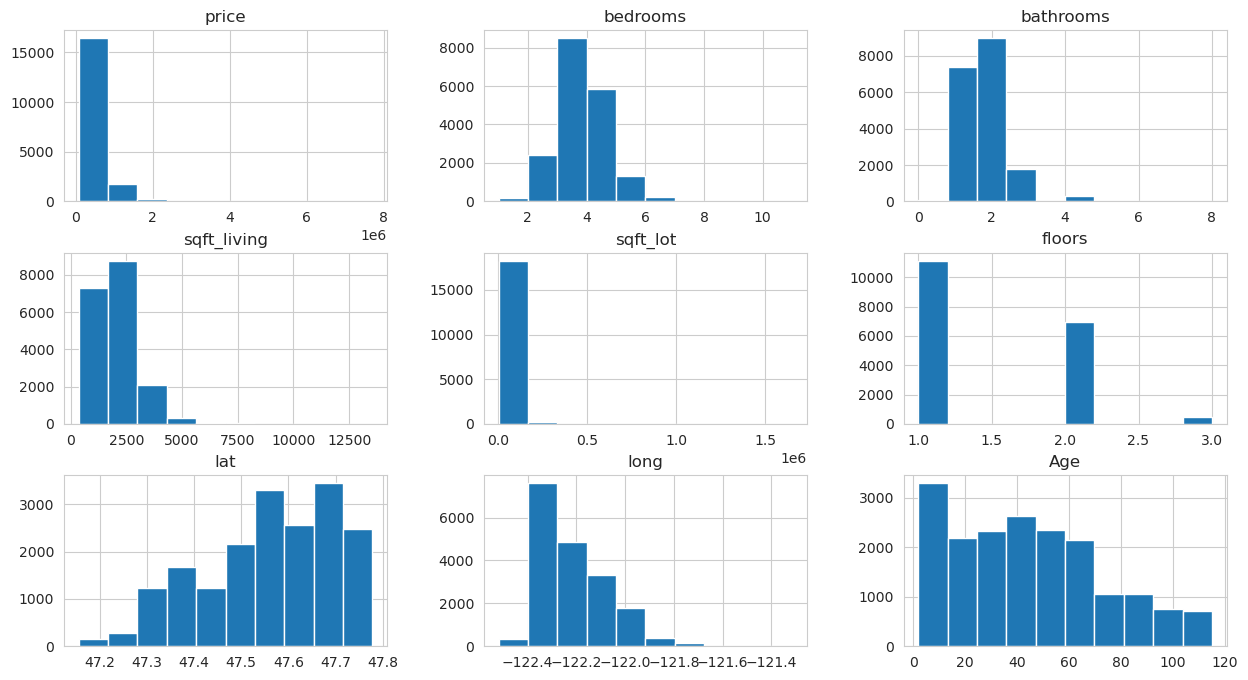

In [41]:
#The distribution of the column
clean_data.hist();

##### a) Dealing with numerical data

In [42]:
#Create a numerical data
num_data = clean_data.copy()
num_data = num_data.drop(['waterfront', 'view', 'condition', 'grade', 'lat', 'long'], axis=1)
num_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,Age
1,538000.0,3,2,2570,7242,2,63
2,180000.0,2,1,770,10000,1,82
3,604000.0,4,3,1960,5000,1,49
4,510000.0,3,2,1680,8080,1,28
5,1230000.0,4,4,5420,101930,1,13
...,...,...,...,...,...,...,...
21590,1010000.0,4,3,3510,7200,2,6
21591,475000.0,3,2,1310,1294,2,7
21592,360000.0,3,2,1530,1131,3,5
21594,402101.0,2,0,1020,1350,2,5


<Axes: >

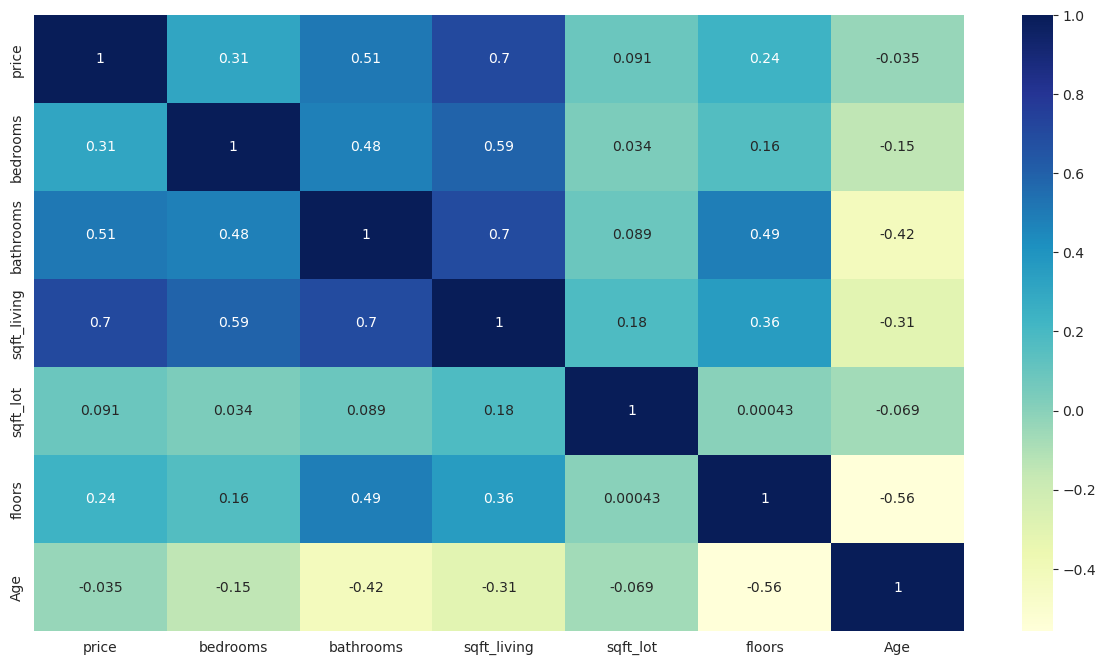

In [43]:
#Check for correlation
sns.heatmap(num_data.corr(), annot=True, cmap='YlGnBu')

**Observations:**
1. Price has a positive correlation with bedrooms (0.314532), bathrooms (0.509584), and sqft_living (0.704214). This indicates that as these variables increase, the price tends to increase as well.
2. Price has a weak positive correlation with floors (0.236765), indicating that houses with more floors may have slightly higher prices, although the relationship is not as strong as with other variables.
3. Price has a weak negative correlation with Age (-0.042508), suggesting that older houses may have lower prices, but the correlation is not very significant.

**Building a model**

In [44]:
#Determin the variables
X_num, y_num = num_data.drop('price', axis=1), num_data['price']

#Build and fit the model and check the results
model1 = sm.OLS(y_num, sm.add_constant(X_num)).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     3989.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:04:21   Log-Likelihood:            -2.5593e+05
No. Observations:               18516   AIC:                         5.119e+05
Df Residuals:                   18509   BIC:                         5.119e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.013e+05   1.06e+04    -19.017      0.000   -2.22e+05   -1.81e+05
bedrooms    -7.362e+04   2495.974    -29.496      0.000   -7.85e+04   -6.87e+04
bathrooms    6.524e+04   3761.745     17.342      0.000    5.79e+04    7.26e+04
sqft_living   314.5448      3.046    103.282      0.000     308.575     320.514
sqft_lot       -0.3264      0.044     -7.360      0.000      -0.413      -0.239
floors       5.084e+04   4249.077     11.966      0.000    4.25e+04    5.92e+04
Age          3473.2025     76.834     45.204      0.000    3322.602    3623.804
==============================================================================
Omnibus:                    12126.529   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           449504.302
Skew:                           2.625   Prob(JB):                         0.00
Kurtosis:                      26.560   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Finding**
1. R-squared: The R-squared value of 0.564 indicates that approximately 56.4% of the variation in the dependent variable (price) can be explained by the independent variables included in the model. This suggests a moderate level of goodness of fit.
2. F-statistic: The associated p-value (Prob (F-statistic)) is close to zero, indicating strong evidence against the null hypothesis that all of the coefficients are zero.
3. One-unit increase in sqft_living is associated with an increase in \\$315.3238.

**Testing for multicollinearity**

In [45]:
# Get the X variables
X_m = num_data.drop('price', axis='columns')

# Calculate the correlation matrix
correlation_matrix = X_m.corr()

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["Variable"] = X_m.columns
vif["VIF"] = [sm.OLS(X_m[col], X_m.drop(col, axis=1)).fit().rsquared for col in X_m.columns]

print("Correlation Matrix:")
print(correlation_matrix)
print("\nVariance Inflation Factor (VIF):")
print(vif)


Correlation Matrix:
             bedrooms  bathrooms  sqft_living  sqft_lot    floors       Age
bedrooms     1.000000   0.477150     0.588456  0.033664  0.162130 -0.148816
bathrooms    0.477150   1.000000     0.698001  0.088928  0.487811 -0.421599
sqft_living  0.588456   0.698001     1.000000  0.179823  0.355193 -0.305265
sqft_lot     0.033664   0.088928     0.179823  1.000000  0.000428 -0.069166
floors       0.162130   0.487811     0.355193  0.000428  1.000000 -0.557860
Age         -0.148816  -0.421599    -0.305265 -0.069166 -0.557860  1.000000

Variance Inflation Factor (VIF):
      Variable       VIF
0     bedrooms  0.943116
1    bathrooms  0.935090
2  sqft_living  0.931557
3     sqft_lot  0.154827
4       floors  0.880986
5          Age  0.657911


In this case, all the predictor variables have VIF values below 1, which suggests low multicollinearity. Which is generally a good sign.

##### b) Dealing with categorical data

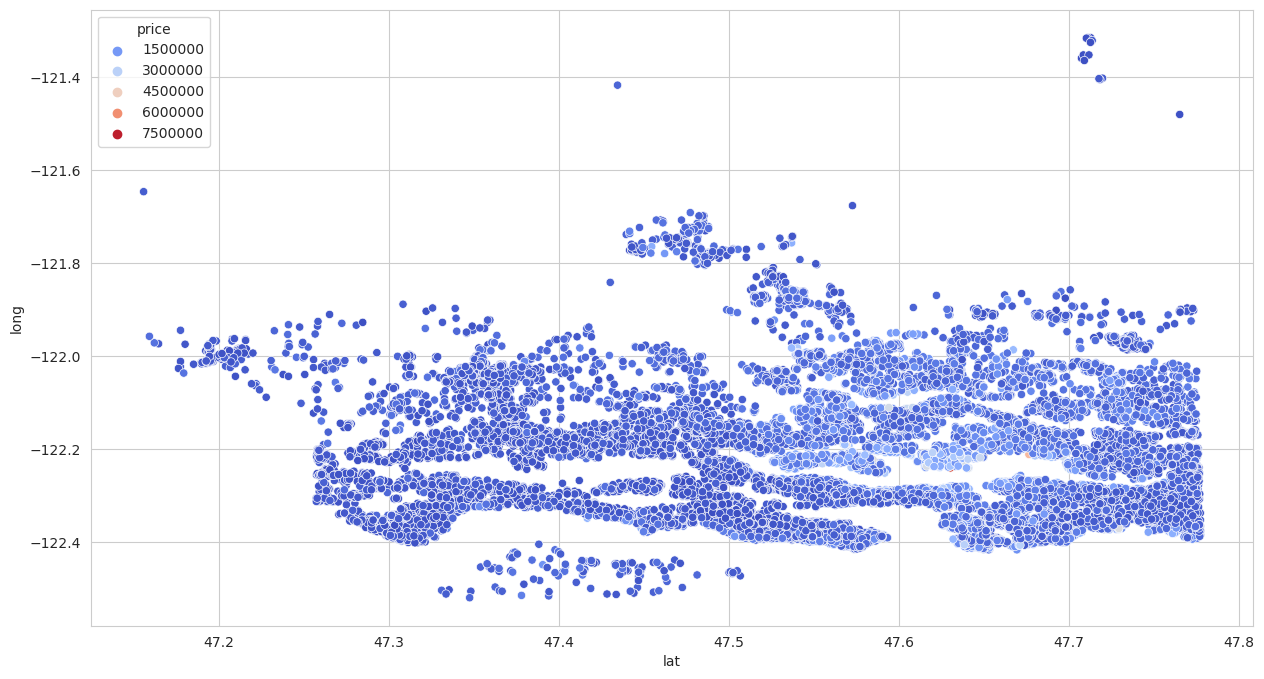

In [46]:
#prices with locations
plt.figure(figsize=(15,8))
sns.scatterplot(x='lat', y='long',data=clean_data, hue='price', palette='coolwarm');

In [63]:
#get a copy of the clean data to work with
location= clean_data.copy()
location

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,lat,long,Age
1,538000.0,3,2,2570,7242,2,NO,NONE,Average,7 Average,47.7210,-122.319,63
2,180000.0,2,1,770,10000,1,NO,NONE,Average,6 Low Average,47.7379,-122.233,82
3,604000.0,4,3,1960,5000,1,NO,NONE,Very Good,7 Average,47.5208,-122.393,49
4,510000.0,3,2,1680,8080,1,NO,NONE,Average,8 Good,47.6168,-122.045,28
5,1230000.0,4,4,5420,101930,1,NO,NONE,Average,11 Excellent,47.6561,-122.005,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,1010000.0,4,3,3510,7200,2,NO,NONE,Average,9 Better,47.5537,-122.398,6
21591,475000.0,3,2,1310,1294,2,NO,NONE,Average,8 Good,47.5773,-122.409,7
21592,360000.0,3,2,1530,1131,3,NO,NONE,Average,8 Good,47.6993,-122.346,5
21594,402101.0,2,0,1020,1350,2,NO,NONE,Average,7 Average,47.5944,-122.299,5


In [64]:
#Drop all numeric data
location_test = location.drop(['bedrooms','bathrooms','sqft_lot','sqft_living', 'floors','lat','long','Age'], axis=1)
location_test.head()

,price,waterfront,view,condition,grade
1,538000.0,NO,NONE,Average,7 Average
2,180000.0,NO,NONE,Average,6 Low Average
3,604000.0,NO,NONE,Very Good,7 Average
4,510000.0,NO,NONE,Average,8 Good
5,1230000.0,NO,NONE,Average,11 Excellent


In [65]:
categorical = check_house.select_dtypes("object")

for col in categorical:
    print(check_house[col].value_counts(), "\n")

waterfront
NO     18373
YES      143
Name: count, dtype: int64 

view
NONE         16695
AVERAGE        829
GOOD           426
EXCELLENT      286
FAIR           280
Name: count, dtype: int64 

condition
Average      11790
Good          5041
Very Good     1508
Fair           152
Poor            25
Name: count, dtype: int64 

grade
7 Average        7907
8 Good           5117
9 Better         2074
6 Low Average    1803
10 Very Good      940
11 Excellent      343
5 Fair            212
12 Luxury          81
4 Low              25
13 Mansion         13
3 Poor              1
Name: count, dtype: int64 



**One hot and label encoding**
- Label encode water front, condition and grade columns.
- One hot encoding view column.

In [66]:
#Label encoding on the waterfront column to be a binary of 0 and 1
location_test.loc[:, 'waterfront'] = location_test['waterfront'].map({'YES': 1, 'NO': 0})

#label encode condition
location_test.loc[:, 'condition'] = location_test['condition'].map({'Poor': 1, 'Fair': 2,
                                                                    'Average': 3, 'Good': 4, 'Very Good': 5})

#Extract values of the grade
location_test['grade'] = location_test['grade'].str.extract('(\d+)').astype(int)

location_test.loc[:, 'grade'] = location_test['grade'].map({3: 'Poor', 4: 'Low', 6: 'Low Average', 7: 'Average',
                                                            5: 'Fair', 9: 'Better', 10: 'Very Good', 11: 'Excellent', 12: 'Luxury', 8:'Good', 13: 'Mansion'})
# Label encode grade
location_test.loc[:, 'grade'] = location_test['grade'].map({'Poor': 1, 'Low': 2, 'Low Average': 3, 'Average': 4,
                                                            'Fair': 5, 'Better': 7, 'Very Good': 8, 'Excellent': 9, 'Luxury': 10, 'Good': 6, 'Mansion':11})



location_test.head()

,price,waterfront,view,condition,grade
1,538000.0,0,NONE,3,4
2,180000.0,0,NONE,3,3
3,604000.0,0,NONE,5,4
4,510000.0,0,NONE,3,6
5,1230000.0,0,NONE,3,9


In [67]:
#one-hot encode the view
view_dummies = pd.get_dummies(location_test['view'], prefix='view', dtype='int')
location_test = pd.concat([location_test, view_dummies], axis=1)

In [68]:
# Drop the view column
location_test = location_test.drop("view", axis=1)
location_test.head()

,price,waterfront,condition,grade,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
1,538000.0,0,3,4,0,0,0,0,1
2,180000.0,0,3,3,0,0,0,0,1
3,604000.0,0,5,4,0,0,0,0,1
4,510000.0,0,3,6,0,0,0,0,1
5,1230000.0,0,3,9,0,0,0,0,1


<Axes: >

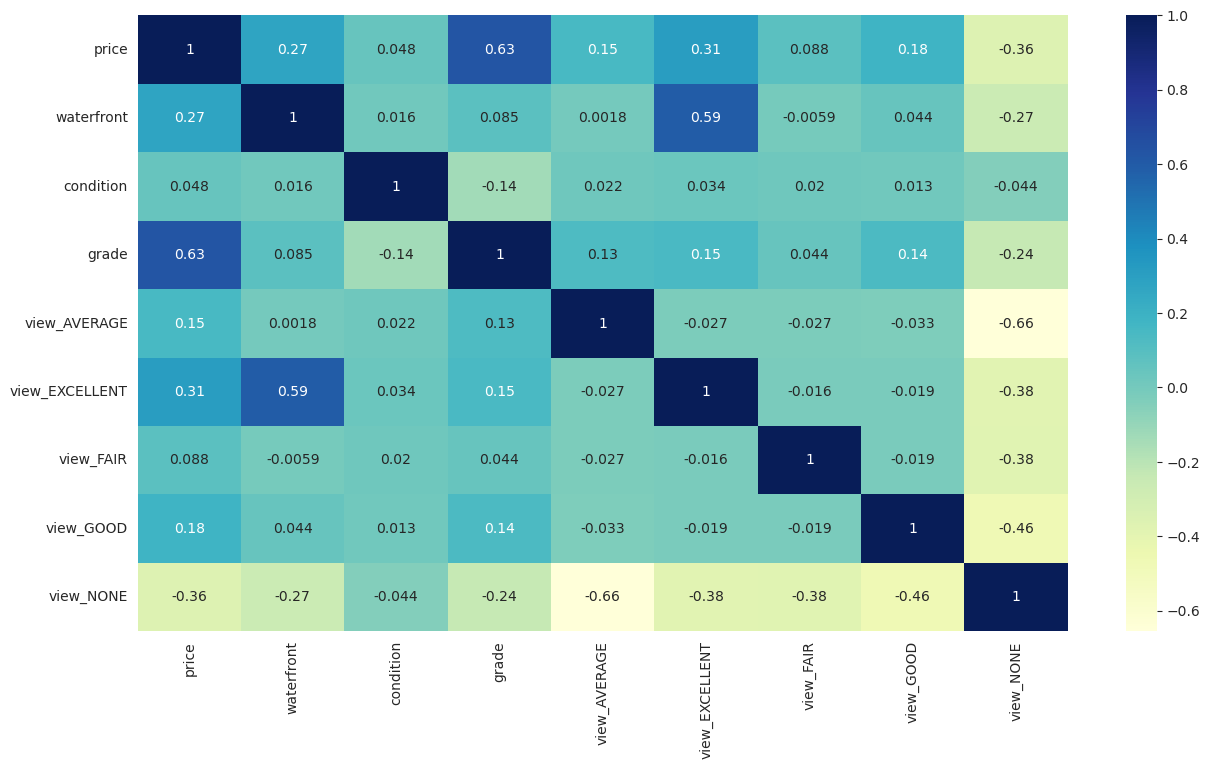

In [69]:
#Check the correlation of this with the prices
plt.figure(figsize=(15,8))
sns.heatmap(location_test.corr(), annot=True, cmap='YlGnBu')

**Observations**
1. Waterfront: There is a moderate positive correlation between waterfront properties and price. This suggests that houses with a waterfront view tend to have higher prices.
2. Grade: There is a strong positive correlation between the grade of the house and its price. Higher-grade houses tend to have higher prices, indicating that the quality and features of the house are important factors in determining its value.
3. View: The presence or quality of the view is positively correlated with the price. Houses with better views (view_EXCELLENT, view_GOOD) tend to have higher prices, while houses with no view (view_NONE) have a negative correlation with the price.
4. Condition: The correlation between condition and price is very weak, indicating that the overall condition of the house may not have a significant impact on its price.

 **Building a model for the categorical data**

In [70]:
# Drop the column view_Fait that we did one-hot encoding
location_test.drop("view_FAIR", axis=1, inplace=True)
location_test

,price,waterfront,condition,grade,view_AVERAGE,view_EXCELLENT,view_GOOD,view_NONE
1,538000.0,0,3,4,0,0,0,1
2,180000.0,0,3,3,0,0,0,1
3,604000.0,0,5,4,0,0,0,1
4,510000.0,0,3,6,0,0,0,1
5,1230000.0,0,3,9,0,0,0,1
...,...,...,...,...,...,...,...,...
21590,1010000.0,0,3,7,0,0,0,1
21591,475000.0,0,3,6,0,0,0,1
21592,360000.0,0,3,6,0,0,0,1
21594,402101.0,0,3,4,0,0,0,1


In [71]:
#Determin the variables
X_cat, y_cat = location_test.drop('price', axis=1), location_test['price']

#Convert to int
X_cat = X_cat.apply(pd.to_numeric)
y_cat = pd.to_numeric(y_cat)

#Build and fit the model and check the results
model2 = sm.OLS(y_cat, sm.add_constant(X_cat)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     2562.
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:52:28   Log-Likelihood:            -2.5734e+05
No. Observations:               18516   AIC:                         5.147e+05
Df Residuals:                   18508   BIC:                         5.148e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.211e+05   2.09e+04    -10.591      0.000   -2.62e+05    -1.8e+05
waterfront      5.387e+05   2.75e+04     19.573      0.000    4.85e+05    5.93e+05
condition       6.561e+04   2980.150     22.015      0.000    5.98e+04    7.15e+04
grade           1.383e+05   1298.014    106.555      0.000    1.36e+05    1.41e+05
view_AVERAGE   -5.617e+04   1.82e+04     -3.089      0.002   -9.18e+04   -2.05e+04
view_EXCELLENT  2.501e+05    2.5e+04      9.999      0.000    2.01e+05    2.99e+05
view_GOOD       4.708e+04   2.03e+04      2.322      0.020    7342.008    8.68e+04
view_NONE      -2.031e+05   1.59e+04    -12.792      0.000   -2.34e+05   -1.72e+05
==============================================================================
Omnibus:                    17021.036   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2141281.189
Skew:                           3.993   Prob(JB):                         0.00
Kurtosis:                      55.074   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations**
1. R-squared: The R-squared value of 0.491 indicates that approximately 49.1% of the variation in the price can be explained by the independent variables included in the model. This suggests a moderate level of predictive power.
2. F-statistic: The F-statistic of 2589 and its associated p-value of 0.00 indicate that the overall model is statistically significant. This means that at least one of the independent variables has a significant impact on the price.
3. Waterfront: Holding other variables constant, having a waterfront location is associated with an increase of approximately 536,300 in the price.
4. Condition: Holding other variables constant, an increase of one unit in the condition rating is associated with an increase of approximately 65,640 in the price.
5. Grade: Holding other variables constant, an increase of one grade level is associated with an increase of approximately 139,000 in the price.

##### a) Model factoring all the varibles
Combining the categorical and numericall dataset to build a model with all the factors factored in.

In [72]:
# Drop the column price
x = num_data.drop(['price'], axis=1)

In [47]:
#Concantinate the x and the location test 
model_data = pd.concat([location_test, x], axis=1)

In [48]:
#Determin the variables
X, y_target = model_data.drop('price', axis=1), model_data['price']

In [49]:
X = X.apply(pd.to_numeric)
y_target = pd.to_numeric(y_target)

In [50]:
#Build and fit the model and check the results
model = sm.OLS(y_target, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2606.
Date:                Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:33:49   Log-Likelihood:            -2.5755e+05
No. Observations:               18766   AIC:                         5.151e+05
Df Residuals:                   18752   BIC:                         5.152e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.586e+05   1.92e+04    -18.671      0.000   -3.96e+05   -3.21e+05
waterfront      4.976e+05   2.31e+04     21.527      0.000    4.52e+05    5.43e+05
condition       1.995e+04   2666.190      7.483      0.000    1.47e+04    2.52e+04
grade           7.356e+04   1668.392     44.088      0.000    7.03e+04    7.68e+04
view_AVERAGE   -5.129e+04   1.51e+04     -3.387      0.001    -8.1e+04   -2.16e+04
view_EXCELLENT  1.787e+05   2.09e+04      8.566      0.000    1.38e+05     2.2e+05
view_GOOD       1.242e+04   1.69e+04      0.735      0.462   -2.07e+04    4.55e+04
view_NONE      -1.068e+05   1.32e+04     -8.066      0.000   -1.33e+05   -8.09e+04
bedrooms       -4.679e+04   2298.180    -20.359      0.000   -5.13e+04   -4.23e+04
bathrooms       5.592e+04   3390.325     16.495      0.000    4.93e+04    6.26e+04
sqft_living      203.8604      3.393     60.084      0.000     197.210     210.511
sqft_lot          -0.3006      0.040     -7.470      0.000      -0.379      -0.222
floors          2.145e+04   3940.613      5.443      0.000    1.37e+04    2.92e+04
Age             3486.4345     73.176     47.644      0.000    3343.003    3629.866
==============================================================================
Omnibus:                    13546.482   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           867871.035
Skew:                           2.855   Prob(JB):                         0.00
Kurtosis:                      35.822   Cond. No.                     8.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Drop values that are not statistically significant**

- This is to improve the model 

In [51]:
# Get the p-values of the coefficients
p_values = model.pvalues

# Set a significance threshold (e.g., 0.05)
significance_threshold = 0.05

# Get the indices of the non-significant variables
non_significant_indices = p_values > significance_threshold

# Filter out the non-significant variables from X
significant_X = X.loc[:, ~non_significant_indices]

# Refit the model with the significant variables only
updated_model = sm.OLS(y_target, significant_X)
updated_results = updated_model.fit()

# Print the updated regression results
updated_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                          1.178e+04
Date:                Fri, 07 Jul 2023   Prob (F-statistic):                        0.00
Time:                        18:33:49   Log-Likelihood:                     -2.5778e+05
No. Observations:               18766   AIC:                                  5.156e+05
Df Residuals:                   18754   BIC:                                  5.157e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront       4.78e+05   2.34e+04     20.469      0.000    4.32e+05    5.24e+05
condition      -8799.4357   2321.373     -3.791      0.000   -1.33e+04   -4249.335
grade           6.149e+04   1585.708     38.780      0.000    5.84e+04    6.46e+04
view_AVERAGE   -1.458e+05   1.06e+04    -13.733      0.000   -1.67e+05   -1.25e+05
view_EXCELLENT  1.017e+05   1.79e+04      5.679      0.000    6.66e+04    1.37e+05
view_NONE      -2.177e+05   7240.618    -30.063      0.000   -2.32e+05   -2.03e+05
bedrooms       -5.991e+04   2239.241    -26.757      0.000   -6.43e+04   -5.55e+04
bathrooms       5.174e+04   3424.395     15.110      0.000     4.5e+04    5.85e+04
sqft_living      215.7328      3.386     63.715      0.000     209.096     222.369
sqft_lot          -0.3642      0.041     -8.979      0.000      -0.444      -0.285
floors         -4860.3589   3783.076     -1.285      0.199   -1.23e+04    2554.812
Age             2951.1689     69.454     42.491      0.000    2815.032    3087.306
==============================================================================
Omnibus:                    13465.542   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           815018.117
Skew:                           2.847   Prob(JB):                         0.00
Kurtosis:                      34.779   Cond. No.                     7.03e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Regression Results

**Observation**
1. This regression model explains approximately 88.3% of the variance in the dependent variable (price) based on the R-squared value of 0.883. The adjusted R-squared value is also 0.883, indicating that the inclusion of the independent variables in the model improves the goodness of fit.
2. The F-statistic is significant with a very low p-value, suggesting that the overall model is statistically significant. This means that at least one of the independent variables is significantly related to the dependent variable.
 
 **_Interpreting the coeffients_**
 
* Waterfront: Holding all other variables constant, having a waterfront view is associated with an average increase of 478,000 in the price.
* Grade: Holding all other variables constant, a one-unit increase in the grade is associated with an increase of 61,490 in the price
* View_EXCELLENT: Holding all other variables constant, having an excellent view rating is associated with an **increase** of 101,700 in the price, while View_NONE: Holding all other variables constant, having no view is associated with a **decrease** of 217,700 in the price.
* Sqft_living: Holding all other variables constant, a one-unit increase in the square footage of living space is associated with an increase of 215.73 in the price.

#### Evaluating the model
We will use the mean absolute error.

In [52]:
mae = model1.resid.abs().sum() / len(y)
mae

159601.82691988407

 **Q-Q plot and residual**

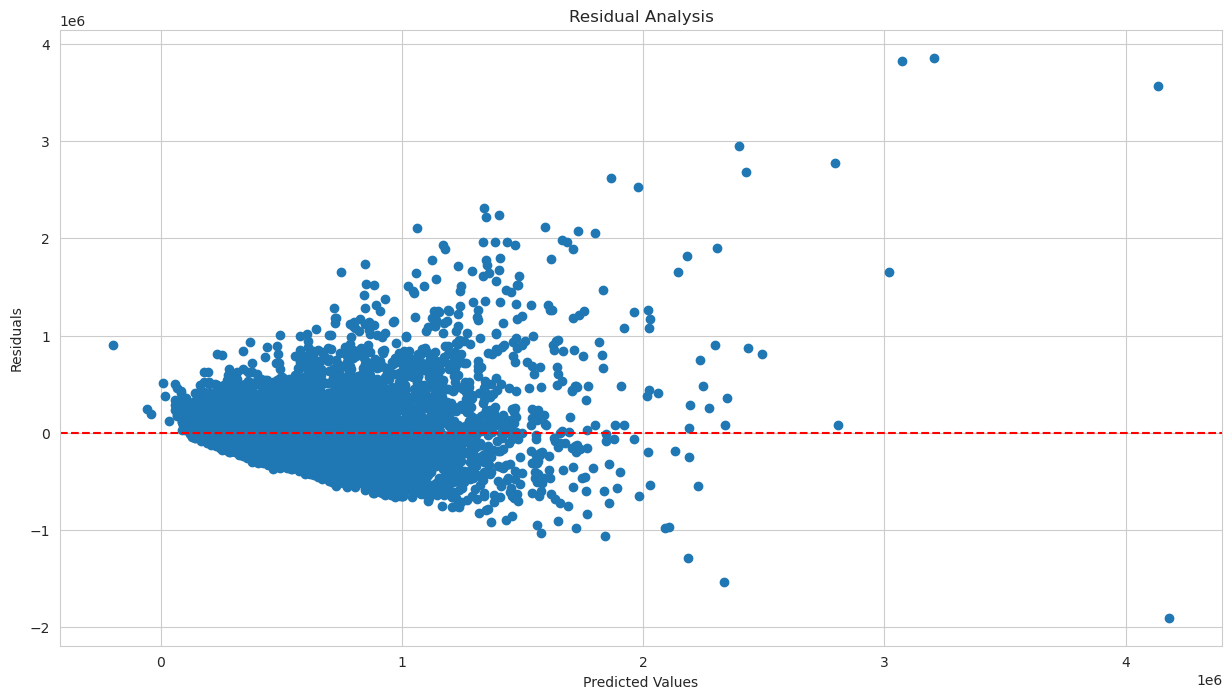

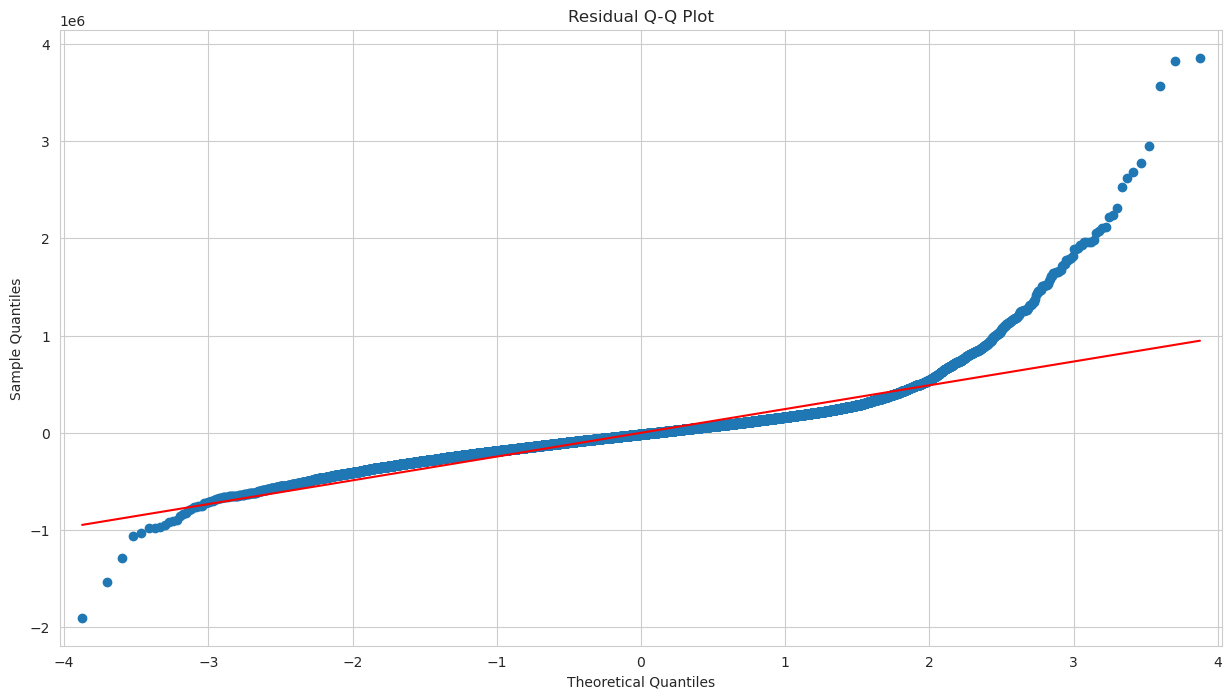

In [53]:
# Get the predicted values from the model
predicted_values = model1.fittedvalues

# Calculate the residuals
residuals = model1.resid

# Plotting the residuals
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

# Checking for heteroscedasticity with a plot of residuals against predicted values
sm.qqplot(residuals, line='s')
plt.title('Residual Q-Q Plot')
plt.show()


The Q-Q plot of the residuals shows a close alignment of the points to a straight line. This indicates that the residuals approximate a normal distribution, which supports the assumption of normality for the model's residuals.

## 5. Conclusion
- The regression model presented in this analysis provides valuable insights into the factors influencing house prices. It demonstrates a strong ability to predict prices based on relevant variables such as waterfront, condition, grade, view categories, bedrooms, bathrooms, square footage of living area, and age. The model's performance and significance make it a valuable tool for understanding the housing market.
-  From the model Several predictor variables emerged as significant contributors to house prices. Notably, the presence of a waterfront, condition, grade, and different view categories (average, excellent, none) showed strong associations with house prices. 
- Additionally, factors such as the number of bedrooms, bathrooms, square footage of living area, and the age of the house played significant roles in determining the price. 
- On the other hand, variables such as square footage of the lot and the number of floors did not demonstrate a significant impact.

## 6. Recommendation
-  The model should be further refined and validated to ensure the model's reliability and applicability in real-world scenarios, moreover, further analysis can enhance its robustness and interpretability.
- The house prices either to sell or purchase should be determined by the location thats the accessibility of the waterfront, presence of a good view and a better or a higer grading.